# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнила студентка гр. 1303 Королева Полина Вариант №12.

## Цель работы

Сформировать знания о работе алгоритмов вычисления одночленов за минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения
Обозначения:

$\lambda(n) - $ уменьшенная на 1 длина бинарной записи n

$\nu(n) - $ вес Хэмминга для бинарной записи (кол-во не нулевых цифр в записи числа)

Для возведения числа x в степень n существуют следующие методы:

**Бинарный метод «SX»**
1. Перевести n в двоичную систему исчисления: $ n = (a_m , ..., a_1)_2 $
2. Отбросить старший бит: $(a_{m-1} , ..., a_1)_2$
3. Произвести замену: 

    $a_i = 1 \Rightarrow a_i = SX$

    $a_i = 0 \Rightarrow a_i = S$

4. Получается строка, в которой указаны слева направо действия над x, для возведения его в степень n, где
$ S $ - возведение в квадрат
$ X $ - уможение на x


Число операций для этого метода: $\lambda(n) + \nu(n) - 1$


**Метод справа-налево**
1. Изначальные значения: $N = n,  Y = 1, Z = x$
2. Если $N$ четное, делим его на 2 и возводим $Z$ в квадрат, иначе делим на 2, умножаем $Y$ на $Z и возводим $Z$ в квадрат$
3. Второй пункт повторяется до тех пор, пока N не окажется равным 0

Переменная Y будет содержать ответ

Число операций для этого метода: $\lambda(n) + \nu(n)$

**Метод множителей**
1. Представить $n = q \cdot p$, где $p$ - наименьший простой множитель, $q > 1 \Rightarrow $ нужно вычислить $(x^p)^q$ 
2. Если $n$ - простое, вычислить $x^{n-1}$ и умножить на $x$
3. При $n=1$ получится сразу $x^n$

**Метод дерева степеней**
1. Пусть построен $k$-ый уровень дерева
2. Двигаясь слева направо, для каждого узла $n$ на этом уровне, присоединяются снизу узлы: $n+a_0, n+a_1, ... , 2n = n+a_{k-1}$

$\{a_i\}_{i=0}^{k-1} $ - путь от корня к узлу $n$, где $a_0 = 1$

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


## 1. Бинарный метод
Разработаем код для этого метода:

In [134]:
def method_SX(n):
    i = 1
    n_bin = str(bin(n))[3::] #срез начинается с 3 индекса, т.к индексы 0-1 - обозначение бинарной записи, а 2 - старший бит
    res = n_bin.replace('0', 'S').replace('1', 'SX')
    print("Получена строка: ", res) 
    print("Степень после каждой итерации:")
    value = var('x')
    show(value)
    for letter in res:
        if letter == 'S':
            value^=2
        else:
            value*=x
        show(value)
    return value

In [135]:
method_SX(5)

Получена строка:  SSX
Степень после каждой итерации:


x

x^2

x^4

x^5

x^5

In [136]:
method_SX(128)

Получена строка:  SSSSSSS
Степень после каждой итерации:


x

x^2

x^4

x^8

x^16

x^32

x^64

x^128

x^128

In [137]:
method_SX(255)

Получена строка:  SXSXSXSXSXSXSX
Степень после каждой итерации:


x

x^2

x^3

x^6

x^7

x^14

x^15

x^30

x^31

x^62

x^63

x^126

x^127

x^254

x^255

x^255

### Вывод
Был реализован бинарный метод SX, его корректность проверена на тестах. Метод действительно быстрее возводит число в степень, нежели при последовательном возведении. Замечено что метод совершает больше итераций, когда количество единиц в бинарной записи числа увеличивается.

## 2. Метод справа налево
Разработаем код для этого метода:

In [138]:
def method_RL(n):
    N = n
    Y = 1
    Z = x
    i = 0
    
    print("№\t|N\t|Y\t|Z\t")
    print("--------|-------|-------|-------")
    print(i, N, Y, Z, sep='\t|')
    
    while N != 0:
        if N%2:
            Y *= Z
        N //= 2 #поскольку в алгоритме есть одинаковые действия для четной и нечетной N, вынесем их из условия
        Z^=2
        i+=1
        print(i, N, Y, Z, sep='\t|')
    return Y

In [139]:
method_RL(5)

№	|N	|Y	|Z	
--------|-------|-------|-------
0	|5	|1	|x
1	|2	|x	|x^2
2	|1	|x	|x^4
3	|0	|x^5	|x^8


x^5

Если переместить полученную таблицу в блок Markdown, результат красиво оформится:

№	|N	|Y	|Z	
--------|-------|-------|-------
0	|5	|1	|x
1	|2	|x	|x^2
2	|1	|x	|x^4
3	|0	|x^5	|x^8

In [140]:
method_RL(128)

№	|N	|Y	|Z	
--------|-------|-------|-------
0	|128	|1	|x
1	|64	|1	|x^2
2	|32	|1	|x^4
3	|16	|1	|x^8
4	|8	|1	|x^16
5	|4	|1	|x^32
6	|2	|1	|x^64
7	|1	|1	|x^128
8	|0	|x^128	|x^256


x^128

№	|N	|Y	|Z	
--------|-------|-------|-------
0	|128	|1	|x
1	|64	|1	|x^2
2	|32	|1	|x^4
3	|16	|1	|x^8
4	|8	|1	|x^16
5	|4	|1	|x^32
6	|2	|1	|x^64
7	|1	|1	|x^128
8	|0	|x^128	|x^256

In [141]:
method_RL(255)

№	|N	|Y	|Z	
--------|-------|-------|-------
0	|255	|1	|x
1	|127	|x	|x^2
2	|63	|x^3	|x^4
3	|31	|x^7	|x^8
4	|15	|x^15	|x^16
5	|7	|x^31	|x^32
6	|3	|x^63	|x^64
7	|1	|x^127	|x^128
8	|0	|x^255	|x^256


x^255

№	|N	|Y	|Z	
--------|-------|-------|-------
0	|255	|1	|x
1	|127	|x	|x^2
2	|63	|x^3	|x^4
3	|31	|x^7	|x^8
4	|15	|x^15	|x^16
5	|7	|x^31	|x^32
6	|3	|x^63	|x^64
7	|1	|x^127	|x^128
8	|0	|x^255	|x^256

### Вывод
Был реализован метод справа налево, его корректность проверена на тестах, вывод оформлен в таблицы Markdown. Метод справа налево, как и бинарный метод, очень эффективен для вычисления монома. В общем случае после завершения алгоритма, $Z = (\cfrac{Y_k}{Y_{k-1}})^2$ или $Z = x^{2^i}$, где $i$ - кол-во итераций 

## 3. Сравнение бинарного метода SX и метода справа налево
Чтобы получить более общую оценку, в прошлых пунтках были проведены тесты на маленьких числах и на числах с маленьким/большим кол-вом единиц в бинарной записи.

В этом пункте проведем сравнение кол-ва итераций в двух методах и сравнение теоретической оценки с практическими данными.

###  Тест1
$n = 5$

Бинарная запись: $5 = (101)_2$

Как видно, при маленьких числах кол-во итераций в методах одинаково и в данном случае $i = 3$ 

Сравним с теоретической оценкой:

$\lambda(n) + \nu(n) - 1 = 2 + 2 - 1 = 3  \Rightarrow $ оценка метода SX корректна

$\lambda(n) + \nu(n) = 2 + 2 = 4 \Rightarrow $ оценка метода справа-налево корректна

###  Тест2
$n = 128$

Бинарная запись: $128 = (10000000)_2$, т.е вес Хэмминга для этого числа очень мал

Для теста с $n = 128$ метод SX затратил 7 итераций, метод справа-налево - 8

Сравним с теоретической оценкой:

$\lambda(n) + \nu(n) - 1 = 7 + 1 - 1 = 7  \Rightarrow $ оценка метода SX корректна

$\lambda(n) + \nu(n) = 7 + 1 = 8 \Rightarrow $ - оценка метода справа-налево корректна

### Тест3 
$n = 255$

Бинарная запись: $255 = (11111111)_2$, т.е вес Хэмминга для этого числа велик

Для теста с $n = 255$ метод SX затратил 14 итераций, метод справа-налево - 8

Сравним с теоретической оценкой:

$\lambda(n) + \nu(n) - 1 = 7 + 8 - 1 = 14  \Rightarrow $ оценка метода SX корректна

$\lambda(n) + \nu(n) = 7 + 8 = 15 \Rightarrow $ оценка метода справа-налево корректна (т.к оценка сложности сверху, она может оказаться несколько выше практической сложности, это нормально)

### Вывод
Были сравнены кол-ва итераций для каждого метода в зависимости от входных данных, были проверены оценки сложности, теоретические данные сошлись с практическими.

## 4. Метод множителей
Выполним вручную метод множителей с $n = 5, n = 128, n = 255$

**n = 5**

Т.к $n = 5$ - простое число, вычислим $x^{n-1} = x^4$

$n = p \cdot q, p = 2, q = 2 $

$x^5 = x^4 \cdot x $ (1 операция умножения)

$x^5 = (x^2)^2 \cdot x$ (+2 операции возведения в квадрат)

**Итого: 3 операции**


**n = 128**

$128 = 2 \cdot 64 $

$x^{128} = (x^2)^{64} $ (1 операция возведения в квадрат)

$(x^2)^{64} = ((x^2)^2)^{32} = (((x^2)^2)^2)^{16} = ((((x^2)^2)^2)^2)^8 =  (((((x^2)^2)^2)^2)^2)^4 = (((((((x^2)^2)^2)^2)^2)^2)^2)$ (+6 операций возведения в квадрат)

**Итого: 7 операций**

**n = 255**

$255 = 3 \cdot 85 $

$x^{255} = (x^3)^{85} $

Введем замену $y$:

$y = x^3 = x^2 \cdot x $ (2 операции - возведение в квадрат и умножение)

$x^{255} = y^{85} = (y^5)^{17}$ 

Введем замену $z$:

$z = y^5 = (y^2)^2 \cdot y $ (+3 операции)

$x^{255} = z^{17} = z^{16} \cdot z = (z^2)^8 \cdot z = (((z^2)^2)^2)^2 \cdot z $ (+5 операций - умножение и 4 возведения в квадрат)


**Итого: 10 операций**

### Вывод
Был рассмотрен метод множителей.

В сравнении с двумя рассмотренными ранее методами, метод множителей такой же быстрый. 

- Для $n=5$ кол-во итераций то же, что и в двух других методах
- Для $n=128$ скорость совпадает с бинарным методом и чуть быстрее метода справа-налево
- Для $n=255$ этот метод окзался быстрее бинарного, но немного медленнее метода справа-налево.

## 5. Дерево степеней

Разработаем код, выполняющий построение дерева степеней. 

Дерево будет храниться в виде словаря {вершина1: [список ее родителей вплоть до корня], ... }

In [142]:
def method_Tree(k):
    tree = {1:[1]}
    leaf = [1]
    for level in range(k):
        new_leaf = []
        for elem in leaf:
            for parent in tree[elem]:
                tmp = elem+parent
                if tmp not in tree:
                    new_leaf.append(tmp)
                    tree[tmp] = tree[elem]+[tmp]
        leaf = new_leaf
    return tree

Для отображения дерева реализуем функцию print_tree().

В ней словарь преобразуется к виду, который подходит для sage, создается граф на основе нового словаря и выводится в виде красивого рисунка.

In [143]:
def print_tree(tree, n):
    new_tree = tree.copy()
    new_tree.pop(1)
    sage_tree = {}
    for node, parent in new_tree.items():
        if not sage_tree.get(parent[-2]):
            sage_tree[parent[-2]] = [node]
        else:
            sage_tree[parent[-2]].append(node)
    graph = Graph(sage_tree)
    graph_plot = graph.plot(layout='tree', tree_root=1, vertex_color='white', vertex_colors={'orange': tree[n]})
    graph_plot.show()

Проверим работоспособность кода для k=5, n = 24:

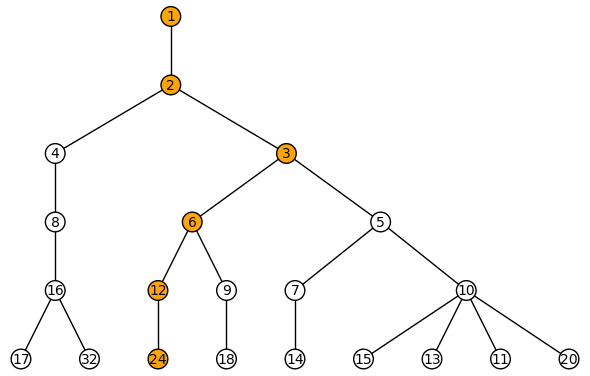

In [144]:
print_tree(method_Tree(5), 24)

Чтобы сравнить этот метод с предыдущими, проведем тесты для $n = 5, n = 128$

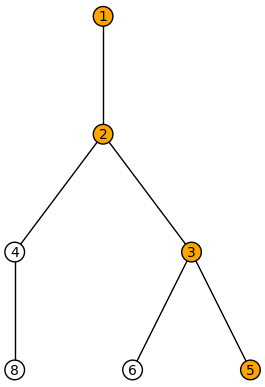

In [145]:
print_tree(method_Tree(3), 5)

Таким образом для $x^5$ цепочка будет следующей:

$x \rightarrow x^2 \rightarrow x^3 \rightarrow x^5$

Количество итераций $= 3$

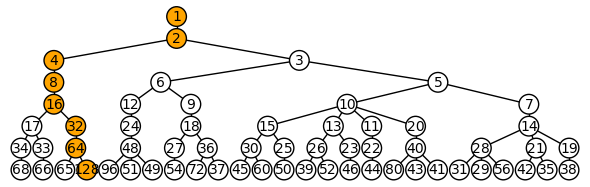

In [146]:
print_tree(method_Tree(7), 128)

Для $x^{128}$ цепочка будет следующей:

$x \rightarrow x^2 \rightarrow x^4 \rightarrow x^8 \rightarrow x^{16} \rightarrow x^{32} \rightarrow x^{64} \rightarrow x^{128}$

Количество итераций $= 7$

### Вывод
Был реализован метод дерева степеней, дерево отображено с использованием средств sagemath, найдена цепочка операций для разных $n$. 

Тестирование показало, что метод дерева степеней не уступает по скорости бинарному методу для $n=5$ и $n=128$.

## Выводы

Были сформированы знания о работе алгоритмов вычисления одночленов за минимальное число операций, привит навык использования систем компьютерной математики для реализации алгоритмов.

Реализованы: бинарный метод SX, метод справа-налево, метод множителей и метод степеней. Методы были сравнены по кол-ву итераций, была проведена теоретическая оценка сложности, изучен способ построения Markdown таблиц и отображения графов посредством sagemath.